In [48]:
# importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_clean= pd.read_csv('../data_clean/data_train_clean.csv')
df_clean

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0,5849,0.0,128.0,360.0,1,LP001002,0,1,1,0,1,0,1,0,0,0,1,0,1
1,1,4583,1508.0,128.0,360.0,1,LP001003,0,1,0,1,1,0,1,0,1,0,0,1,0
2,0,3000,0.0,66.0,360.0,1,LP001005,0,1,0,1,1,0,0,1,0,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1,LP001006,0,1,0,1,0,1,1,0,0,0,1,0,1
4,0,6000,0.0,141.0,360.0,1,LP001008,0,1,1,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1,LP002978,1,0,1,0,1,0,1,0,1,0,0,0,1
610,3,4106,0.0,40.0,180.0,1,LP002979,0,1,0,1,1,0,1,0,1,0,0,0,1
611,1,8072,240.0,253.0,360.0,1,LP002983,0,1,0,1,1,0,1,0,0,0,1,0,1
612,2,7583,0.0,187.0,360.0,1,LP002984,0,1,0,1,1,0,1,0,0,0,1,0,1


In [3]:
#Loan_ID entfernen
#df_clean.drop('Loan_ID', axis = 1, inplace = True)


# DATA VISUALIZATION

In [4]:
df= pd.read_csv('../data_raw/train_u6lujuX_CVtuZ9i.csv')
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df_clean['Loan_Status_Y'].value_counts()

Loan_Status_Y
1    422
0    192
Name: count, dtype: int64

#### Credit_History (>1)--> YES

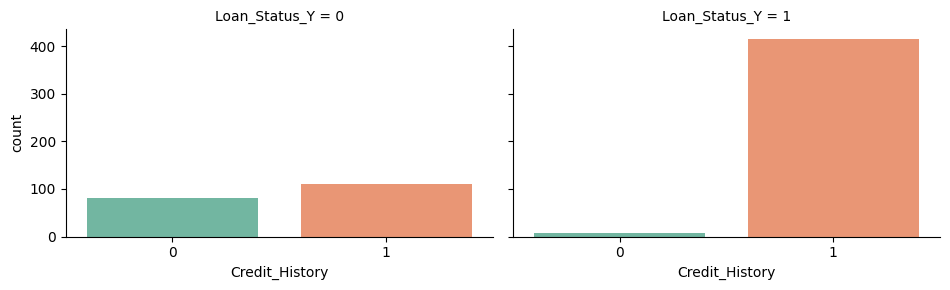

In [6]:
#Credit history
grid= sns.FacetGrid(df_clean,col='Loan_Status_Y',aspect=1.6)
grid.map(sns.countplot,'Credit_History', palette = 'Set2')

#### Dependents( weniger Kinder zB:0 Kinder)--> hohe Wahrscheinlichkeit--> YES

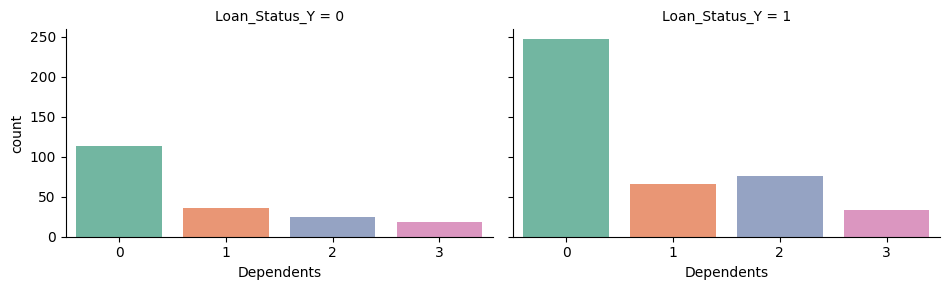

In [7]:
#Dependents
grid= sns.FacetGrid(df_clean,col='Loan_Status_Y',aspect=1.6)
grid.map(sns.countplot,'Dependents', palette = 'Set2')

#### Gender --> Männer sind prioriesiert--> YES

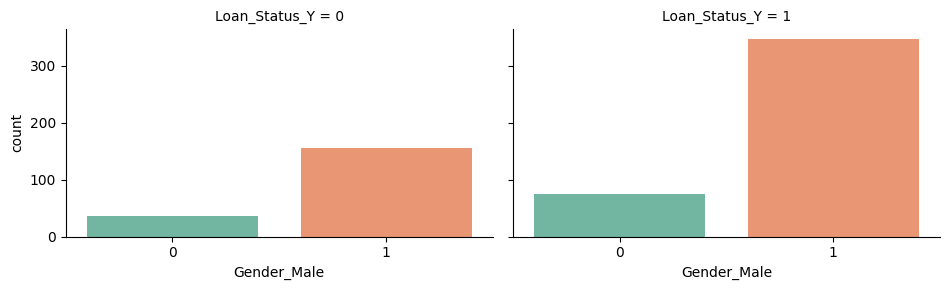

In [8]:
#Gender_Male
grid= sns.FacetGrid(df_clean,col='Loan_Status_Y',aspect=1.6)
grid.map(sns.countplot,'Gender_Male',palette = 'Set2')

#### Married--> verheiratete hohe priorität--> YES

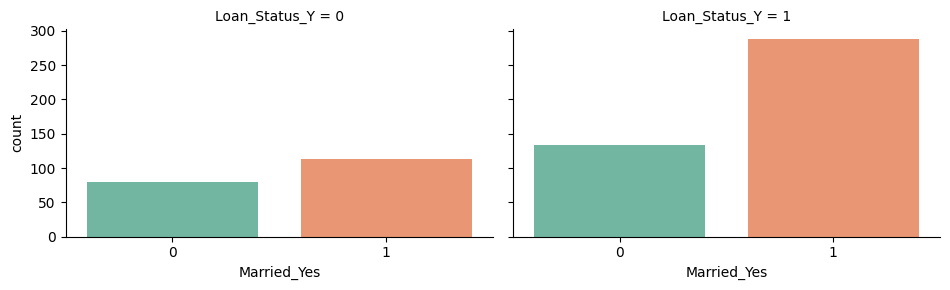

In [9]:
#Married_Yes
grid= sns.FacetGrid(df_clean,col='Loan_Status_Y',aspect=1.6)
grid.map(sns.countplot,'Married_Yes', palette = 'Set2')

#### Educate --> YES

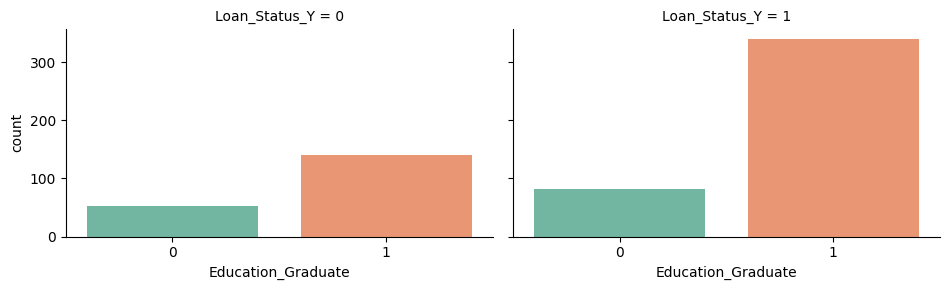

In [10]:
#Education_Graduate
grid= sns.FacetGrid(df_clean,col='Loan_Status_Y',aspect=1.6)
grid.map(sns.countplot,'Education_Graduate',palette = 'Set2')

#### self_Employed--> NO

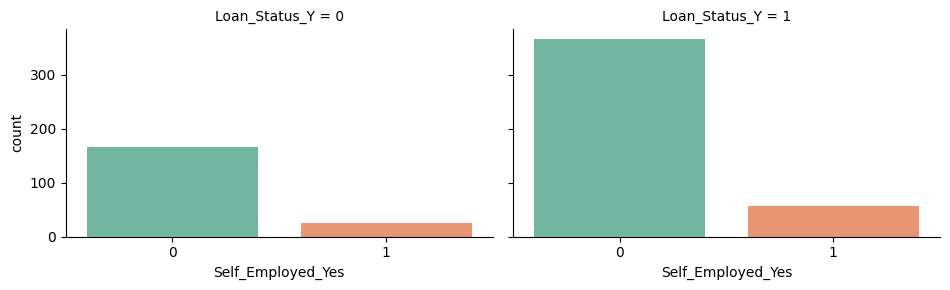

In [11]:
#Self_Employed_Yes
grid= sns.FacetGrid(df_clean,col='Loan_Status_Y',aspect=1.6)
grid.map(sns.countplot,'Self_Employed_Yes',palette = 'Set2')

#### Property_Area_Urban--> NO

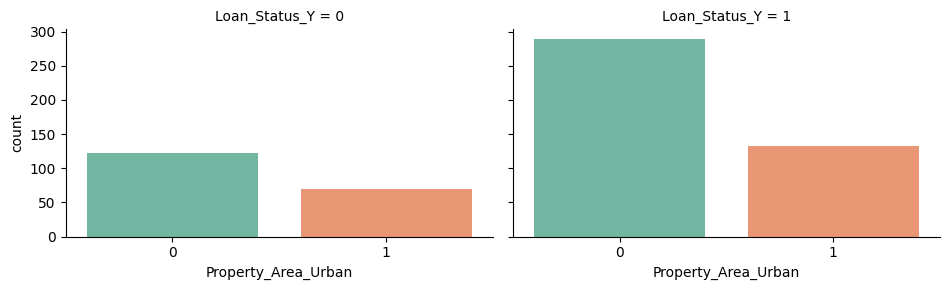

In [12]:
#Property_Area_Urban
grid= sns.FacetGrid(df_clean,col='Loan_Status_Y',aspect=1.6)
grid.map(sns.countplot,'Property_Area_Urban',palette = 'Set2')

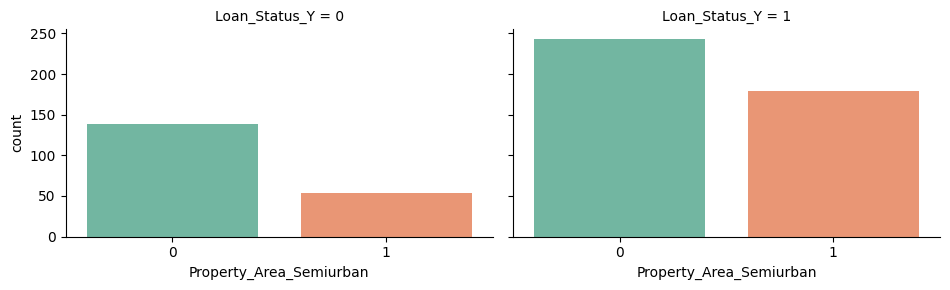

In [13]:
#Property_Area_Semiurban
grid= sns.FacetGrid(df_clean,col='Loan_Status_Y',aspect=1.6)
grid.map(sns.countplot,'Property_Area_Semiurban',palette = 'Set2')

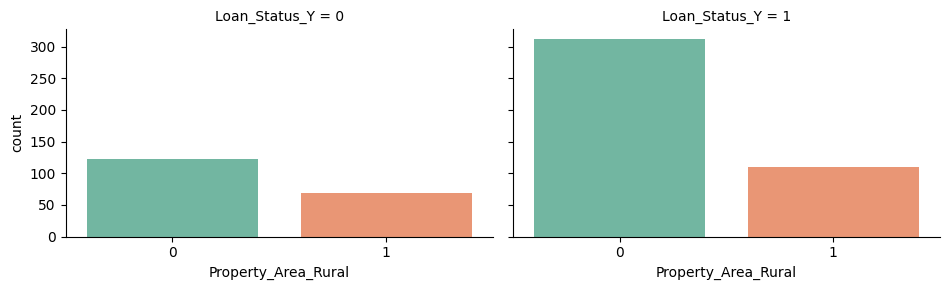

In [14]:
#Property_Area_Rural
grid= sns.FacetGrid(df_clean,col='Loan_Status_Y',aspect=1.6)
grid.map(sns.countplot,'Property_Area_Rural',palette = 'Set2')

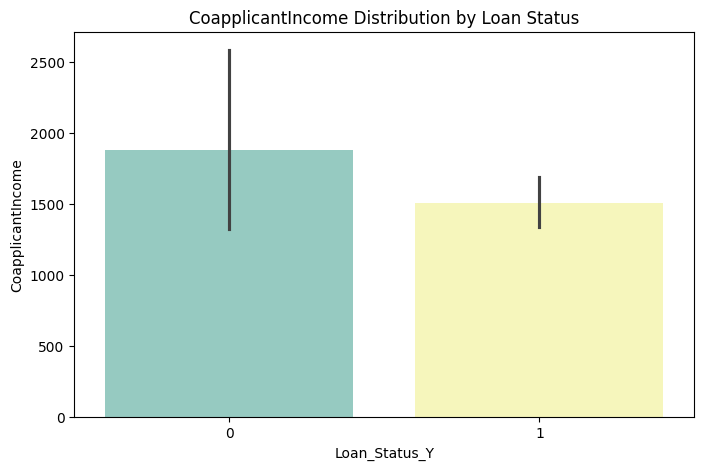

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Loan_Status_Y', y='CoapplicantIncome', data=df_clean, palette='Set3')
plt.title('CoapplicantIncome Distribution by Loan Status')
plt.show()

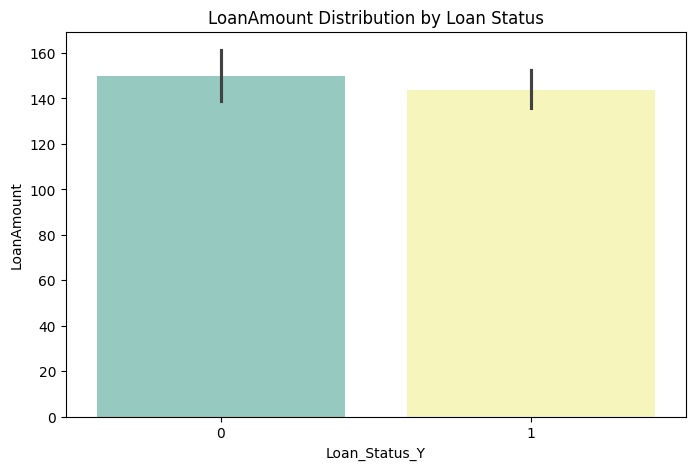

In [16]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Loan_Status_Y', y='LoanAmount', data=df_clean, palette='Set3')
plt.title('LoanAmount Distribution by Loan Status')
plt.show()

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    int64  
 1   ApplicantIncome          614 non-null    int64  
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               614 non-null    float64
 4   Loan_Amount_Term         614 non-null    float64
 5   Credit_History           614 non-null    int64  
 6   Loan_ID                  614 non-null    object 
 7   Gender_Female            614 non-null    int64  
 8   Gender_Male              614 non-null    int64  
 9   Married_No               614 non-null    int64  
 10  Married_Yes              614 non-null    int64  
 11  Education_Graduate       614 non-null    int64  
 12  Education_Not Graduate   614 non-null    int64  
 13  Self_Employed_No         614 non-null    int64  
 14  Self_Employed_Yes        6

In [22]:
#Supprimer loan_id
df_clean.drop('Loan_ID', axis=1, inplace = True)

<Axes: >

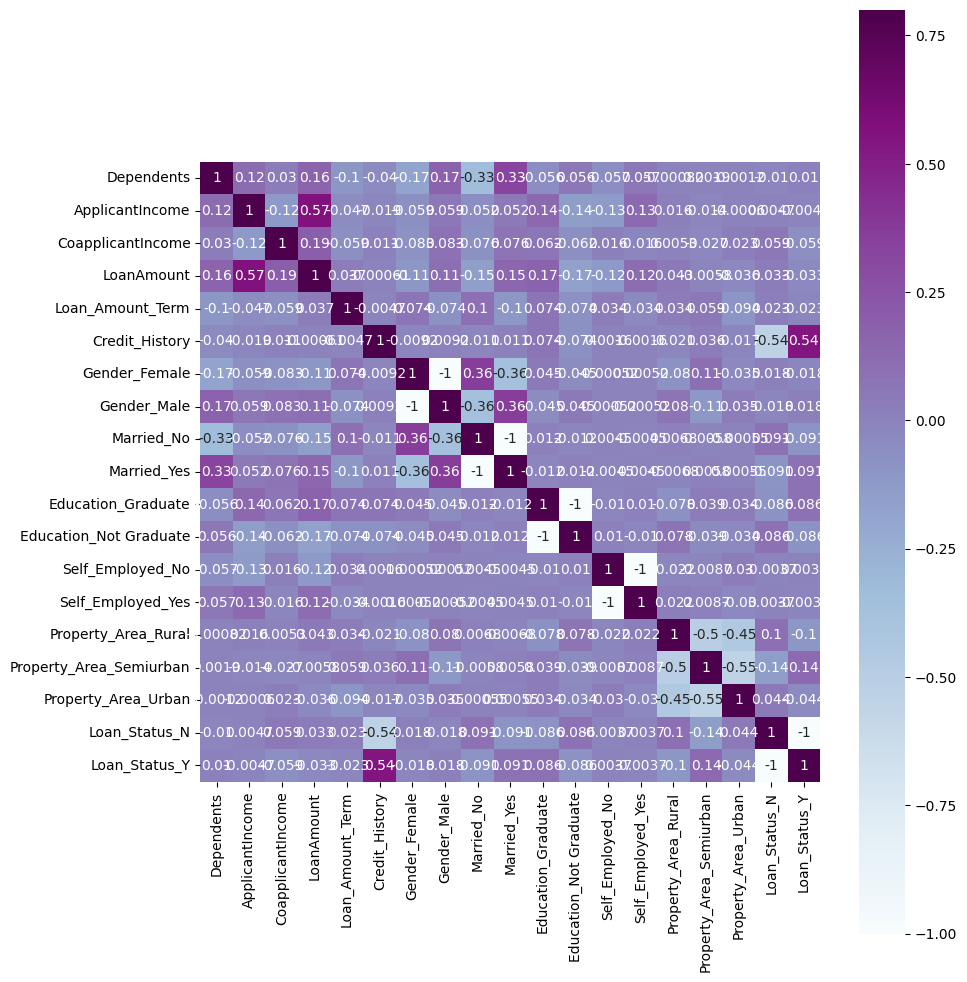

In [23]:
# Correlation des variables numériques
matrix = df_clean.corr()
f,ax = plt.subplots(figsize=(10,12))
sns.heatmap(matrix, vmax =.8, square = True, cmap= 'BuPu',annot = True)

# Modellentwicklung

In [25]:
y = df_clean['Loan_Status_Y']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: int64

In [65]:
X = df_clean.drop(['Loan_Status_Y','Loan_Status_N'], axis= 1)
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,128.0,360.0,1,0,1,1,0,1,0,1,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1,0,1,0,1,1,0,1,0,1,0,0
2,0,3000,0.0,66.0,360.0,1,0,1,0,1,1,0,0,1,0,0,1
3,0,2583,2358.0,120.0,360.0,1,0,1,0,1,0,1,1,0,0,0,1
4,0,6000,0.0,141.0,360.0,1,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1,1,0,1,0,1,0,1,0,1,0,0
610,3,4106,0.0,40.0,180.0,1,0,1,0,1,1,0,1,0,1,0,0
611,1,8072,240.0,253.0,360.0,1,0,1,0,1,1,0,1,0,0,0,1
612,2,7583,0.0,187.0,360.0,1,0,1,0,1,1,0,1,0,0,0,1


In [29]:
df_clean.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,145.752443,342.410423,0.855049,0.182410,0.817590,0.346906,0.653094,0.781759,0.218241,0.866450,0.133550,0.291531,0.379479,0.328990,0.312704,0.687296
std,1.009623,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.386497,0.386497,0.476373,0.476373,0.413389,0.413389,0.340446,0.340446,0.454838,0.485653,0.470229,0.463973,0.463973
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


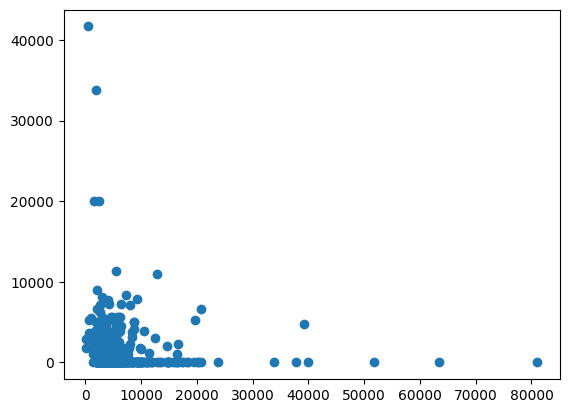

In [43]:
plt.scatter(df_num.ApplicantIncome, df_num.CoapplicantIncome)

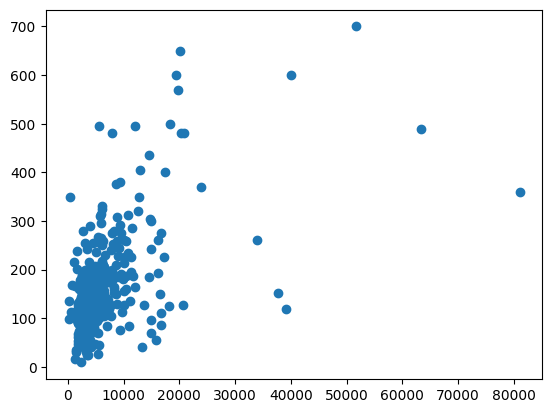

In [45]:
plt.scatter(df_num.ApplicantIncome, df_num.LoanAmount)

#### Outliers behandeln

In [34]:
df_num=df_clean[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

In [35]:
df_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,128.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
609,2900,0.0,71.0,360.0
610,4106,0.0,40.0,180.0
611,8072,240.0,253.0,360.0
612,7583,0.0,187.0,360.0


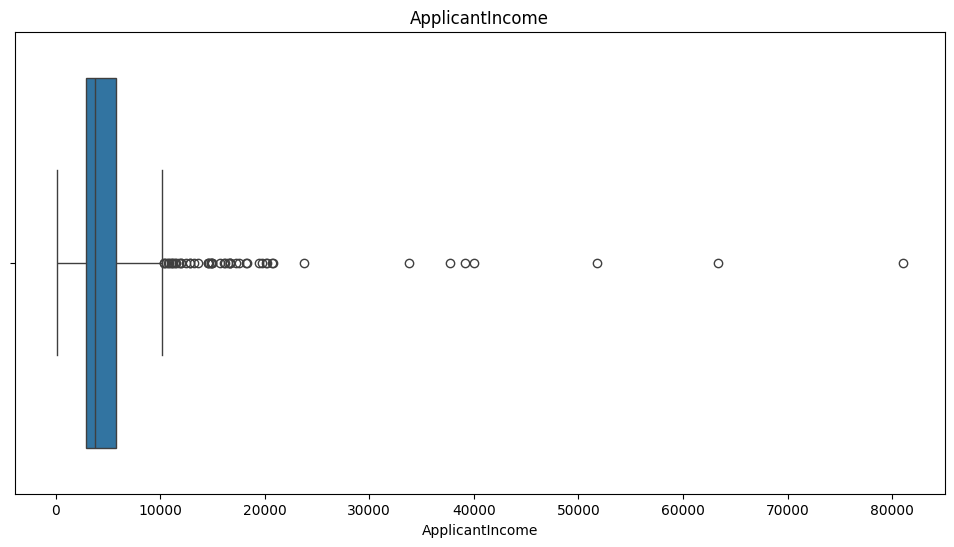

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(data = df_clean, x='ApplicantIncome')
plt.title("ApplicantIncome")
plt.show()

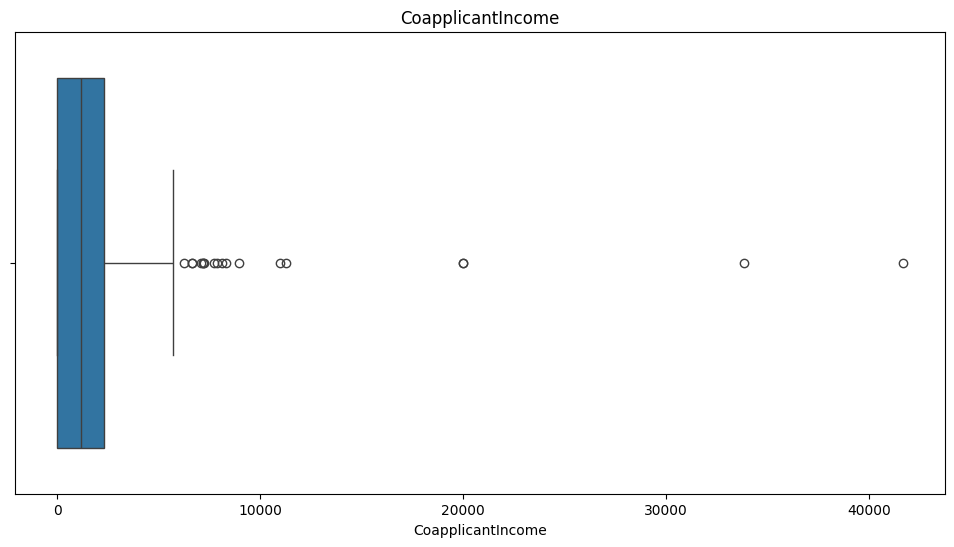

In [30]:
plt.figure(figsize=(12,6))
sns.boxplot(data = df_clean, x='CoapplicantIncome')
plt.title("CoapplicantIncome")
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data = df_clean, x='Loan')
plt.title("ApplicantIncome")
plt.show()

In [41]:
from sklearn.ensemble import IsolationForest
#Appliquer l'isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state = 42)
outlier_labels = iso_forest.fit_predict(df_num)

#Ajouter les labels d'anormalie au Dataframe
df_num['Outlier'] = outlier_labels

#Ajouter les outliers
outliers = df_num[df_num['Outlier'] == -1]
print("Outliers détectés:")
#outliers.head()
print(outliers)

Outliers détectés:
     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Outlier
9              12841            10968.0       349.0             360.0       -1
12              3073             8106.0       200.0             360.0       -1
14              1299             1086.0        17.0             120.0       -1
21              5955             5625.0       315.0             360.0       -1
34             12500             3000.0       320.0             360.0       -1
..               ...                ...         ...               ...      ...
581             1836            33837.0        90.0             360.0       -1
585             4283             3000.0       172.0              84.0       -1
590             3000             3416.0        56.0             180.0       -1
600              416            41667.0       350.0             180.0       -1
604            12000                0.0       496.0             360.0       -1

[62 rows x 5 columns]


#### Outliers werden in der Modelentwicklung mitgenommen

##### Model Building: Part I

In [66]:
# database separieren
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size = 0.2, random_state = 6)

In [67]:
# model instanzieren
clf= LogisticRegression()
# model trainieren
clf.fit(x_train,y_train)

LogisticRegression()

In [68]:
pred= clf.predict(x_test)
pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [69]:
accuracy_score(y_test,pred)

0.8130081300813008

In [70]:
X.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [71]:
# Bespiel1 vorhersgaen
profil_test = [[1,150,0,400,360,0,0,1,1,0,1,0,1,0,1,0,0]]
clf.predict(profil_test)

array([0], dtype=int64)

In [73]:
# Bespiel2 vorhersgaen
profil_test = [[1,150,0,4000,360,1,0,1,0,1,1,0,1,0,1,0,0]]
clf.predict(profil_test)

array([0], dtype=int64)